In [1]:
from keras.models import Sequential, load_model
import keras as k
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.columns
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
columns_to_retain=['sg','al','sc','pcv','wc','rc','htn','classification']
df=df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
df.isna().sum()
# dropping nun values
df = df.dropna(axis =0)

In [5]:
# transforming dataset
for column in  df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform( df[column] )

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,sg,al,sc,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,26,65,30,1,0
3,1.005,4.0,3.8,14,55,15,1,0
4,1.010,2.0,1.4,17,61,23,0,0
5,1.015,3.0,1.1,21,65,21,1,0
7,1.015,2.0,1.1,26,57,27,0,0


In [7]:
#  spliting the data into indepenent and dependent dataset
X = df.drop(['classification'], axis=1)
y = df['classification']

In [8]:
# feture scaling 
# min_max scaler methode
x_scaler =MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.2 ,shuffle=True )

In [11]:
#building the model
#Sequential groups a linear stack of layers into a tf.keras.Model.
#Sequential provides training and inference features on this model.
#Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer
#Initializers define the way to set the initial random weights of Keras layers.

model = Sequential()

model.add(Dense(256 ,input_dim=len(X.columns), kernel_initializer = k.initializers.random_normal(seed =13), activation = 'relu'))
model.add(Dense(1,activation= 'hard_sigmoid'))

In [12]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [13]:
#train the model
training = model.fit(X_train,y_train , epochs=2000 ,batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 41s 41s/step - loss: 0.6901 - accuracy: 0.5445
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6805 - accuracy: 0.5445
Epoch 3/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6712 - accuracy: 0.5654
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6621 - accuracy: 0.6178
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6533 - accuracy: 0.6387
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6448 - accuracy: 0.6702
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6364 - accuracy: 0.6911
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6283 - accuracy: 0.6911
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6204 - accuracy: 0.6963
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6126 - accuracy: 0.7120
Epoch 11/20

1/1 [==============================] - 0s 8ms/step - loss: 0.0620 - accuracy: 0.9791
Epoch 164/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0616 - accuracy: 0.9791
Epoch 165/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0612 - accuracy: 0.9791
Epoch 166/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0609 - accuracy: 0.9791
Epoch 167/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9791
Epoch 168/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0602 - accuracy: 0.9791
Epoch 169/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0598 - accuracy: 0.9791
Epoch 170/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0595 - accuracy: 0.9791
Epoch 171/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9791
Epoch 172/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0588 - accuracy: 0.9791
Epoch 173/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 0.9791
Epoch 246/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9791
Epoch 247/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0420 - accuracy: 0.9791
Epoch 248/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9791
Epoch 249/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0417 - accuracy: 0.9791
Epoch 250/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9791
Epoch 251/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0415 - accuracy: 0.9791
Epoch 252/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9791
Epoch 253/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0412 - accuracy: 0.9791
Epoch 254/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9791
Epoch 255/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9895
Epoch 409/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9895
Epoch 410/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9895
Epoch 411/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9895
Epoch 412/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9895
Epoch 413/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.9895
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9895
Epoch 415/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0258 - accuracy: 0.9895
Epoch 416/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 0.9895
Epoch 417/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9895
Epoch 418/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9895
Epoch 491/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0218 - accuracy: 0.9895
Epoch 492/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9895
Epoch 493/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9895
Epoch 494/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 0.9895
Epoch 495/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9895
Epoch 496/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9895
Epoch 497/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9895
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9895
Epoch 499/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0215 - accuracy: 0.9895
Epoch 500/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.9895
Epoch 573/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9895
Epoch 574/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.9895
Epoch 575/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9895
Epoch 576/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9895
Epoch 577/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9895
Epoch 578/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9895
Epoch 579/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9895
Epoch 580/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9895
Epoch 581/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9895
Epoch 582/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9895
Epoch 655/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9895
Epoch 656/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9895
Epoch 657/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9895
Epoch 658/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0158 - accuracy: 0.9895
Epoch 659/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9895
Epoch 660/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9895
Epoch 661/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0158 - accuracy: 0.9895
Epoch 662/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9895
Epoch 663/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9895
Epoch 664/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9948
Epoch 737/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9948
Epoch 738/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9948
Epoch 739/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9948
Epoch 740/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 741/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 742/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 743/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 744/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 745/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.9948
Epoch 746/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9948
Epoch 819/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.9948
Epoch 820/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9948
Epoch 821/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 0.9948
Epoch 822/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9948
Epoch 823/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9948
Epoch 824/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9948
Epoch 825/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9948
Epoch 826/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9948
Epoch 827/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 0.9948
Epoch 828/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 901/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 902/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 903/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 904/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 905/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 906/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9948
Epoch 907/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9948
Epoch 908/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9948
Epoch 909/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9948
Epoch 910/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 983/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 984/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 985/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 986/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 987/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9948
Epoch 988/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9948
Epoch 989/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9948
Epoch 990/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9948
Epoch 991/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9948
Epoch 992/2000


1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1145/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1146/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1147/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1148/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1149/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1150/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1151/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1152/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 1153/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9948
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1308/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1309/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1310/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1311/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1312/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1313/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1314/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 1315/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9948
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1468/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1469/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1470/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1471/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1472/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1473/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1474/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9948
Epoch 1475/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9948
Epoch 1476/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9948
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1629/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1630/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1631/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1632/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1633/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9948
Epoch 1634/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9948
Epoch 1635/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9948
Epoch 1636/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9948
Epoch 1637/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9948
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1790/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1791/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1792/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1793/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1794/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1795/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1796/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1797/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 1798/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9948
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1952/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1953/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1954/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 1955/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1956/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1957/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1958/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 1959/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 1960/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 

In [14]:
# saving the model
model.save('ckd.model')


INFO:tensorflow:Assets written to: ckd.model\assets


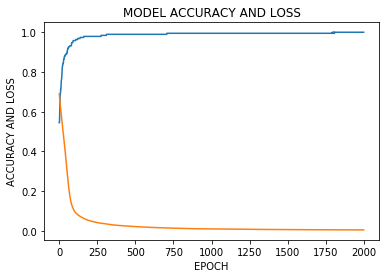

In [15]:
#visualizing the model in loss and accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['loss'])
plt.title('MODEL ACCURACY AND LOSS')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY AND LOSS')
plt.show()

In [16]:
print('shape of training data:', X_train.shape)
print('shape of test data: ', X_test.shape)

shape of training data: (191, 7)
shape of test data:  (48, 7)


In [22]:
# actual and prediction
prediction = model.predict(X_test)
prediction = [1 if y>= 0.5 else 0 for y in prediction]
prediction
print('original : {0}'. format(" ,".join(str(x)for x in y_test)))
print('prediction : {0}'. format(" ,".join(str(x)for x in prediction)))

original : 0 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,0
prediction : 1 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,1 ,0


In [20]:
# show value
y_test

181    0
361    1
172    0
242    0
300    1
321    1
267    1
191    0
240    0
345    1
375    1
386    1
308    1
378    1
164    0
327    1
380    1
92     0
127    0
27     0
19     0
325    1
8      0
332    1
219    0
293    1
383    1
171    0
9      0
253    1
80     0
251    1
377    1
229    0
304    1
56     0
35     0
343    1
391    1
115    0
393    1
25     0
350    1
111    0
278    1
262    1
379    1
110    0
Name: classification, dtype: int32